# Problem Set 4, due February 23 at 11:59am, mid-day, noon.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.keys())
# print(bdata.feature_names)
# print(bdata.data.shape)
# print(bdata.target.shape)
# print(bdata.DESCR)

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [3]:
# Creating objects for linear regression
lm1, lm2 = LinearRegression(), LinearRegression()

# Selecting our X and y parameters
X1 = bdata.data[:,np.where(bdata.feature_names == "RM")[0][0]]
X2 = np.array([X1,X1**2]).T
y = bdata.target
X1 = X1.reshape(-1,1)
y = y.reshape(-1,1)

# Fitting linear and quadratic regression model
lm1.fit(X1, y) # linear model
lm2.fit(X2, y) # quadratic model

slope_lm1, slope_lm2 = lm1.coef_[0][0], lm2.coef_
intercept_lm1, intercept_lm2 = lm1.intercept_[0], lm2.intercept_[0]

print('Linear model with RM:','\nSlope:',slope_lm1,'\nIntercept: ', intercept_lm1)
print('\nLinear model with Quadratic RM:','\nSlope:',slope_lm2[0], '\nIntercept: ', intercept_lm2)

Linear model with RM: 
Slope: 9.10210898118 
Intercept:  -34.6706207764

Linear model with Quadratic RM: 
Slope: [-22.64326237   2.47012384] 
Intercept:  66.0588474848


** 1.1 Interpretation **

We see that when we consider only RM as the predictor, every time the number of rooms increases by 1, the median house value increases by approximately 9000 (Since median values are expressed in 1000's in the dataset).

When we consider the quadratic model using RM to predict median value of houses, we see that the increase in median house value is a function of approximately -22 times the value of room and 2.5 times the value of room squared.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients using a histogram with 25 bins, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

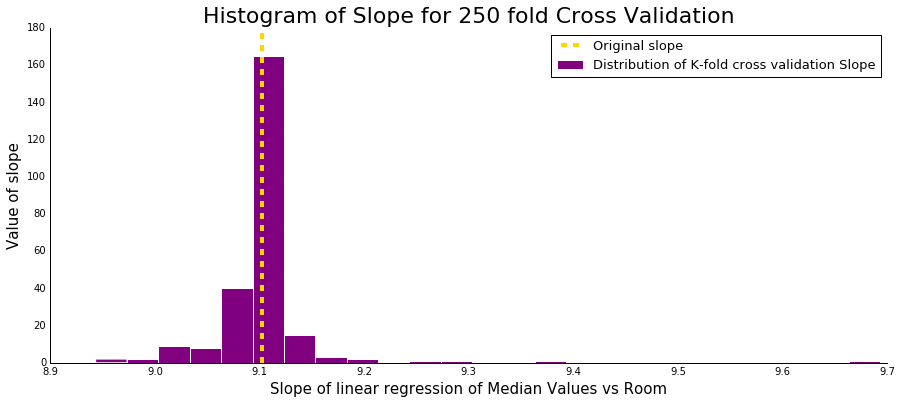

In [4]:
from sklearn.cross_validation import KFold

# Creating object for linear regression
lm = LinearRegression()

# Creating indices for KFold Cross Validation with K = 250
kf = KFold(len(y), n_folds=250)
slope, i = np.zeros(250), 0

# Computing the value of slope for each Cross Validation set
for train_index, test_index in kf:
    #print("TRAIN:", train_index,'\n', "TEST:", test_index,"\n\n---------------\n\n\n")
    X_train, y_train = X1[train_index], y[train_index]
    lm.fit(X_train, y_train)
    slope[i] = lm.coef_[0]
    i+=1

# Plotting a histogram for slopes as well as plotting the value of slope we found out earlier
plt.figure(1,figsize = (15,6))
plt.hist(slope, bins = 25, facecolor = 'purple', edgecolor='white')
plt.xlabel("Slope of linear regression of Median Values vs Room", fontsize = 15)
plt.ylabel("Value of slope", fontsize = 15)
plt.title("Histogram of Slope for 250 fold Cross Validation", fontsize=22)
plt.axvline(slope_lm1, color = "gold", linestyle = "dashed", linewidth = 4)
labels = 'Original slope', 'Distribution of K-fold cross validation Slope'
plt.legend(labels, loc=1, prop={'size':13})

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

** 1.2 Interpretation **

We see that the histogram for slope is approximately normally distributed. We also see that the value we computed for the slope is very close to the actual population mean value of the slope.

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

In [5]:
"""
Function
--------
Custom Function to find Confidence Interval

Parameters
----------
predictor:
    The name of predictor in bdata_features
terms:
    1 for linear term
    2 for quadratic term
    
Returns
-------
    x_pred: The x_values used to compute Confidence Interval
    CI_l: 95% Confidence Interval for lower limit
    CI_u: 95% Confidence Interval for upper limit
    
beta: float
    co-efficient
"""

def conf_int(predictor, terms):
    feature = bdata.data[:,np.where(bdata.feature_names == predictor)[0][0]]

    poly = np.polyfit(feature,bdata.target,terms)
    poly1d = np.poly1d(poly)
    pfit = poly1d(feature)

    # predict y using poly fit
    if terms == 1:
        y_pred = poly[0]*feature + poly[1]
    if terms == 2:
        y_pred = poly[0]*(feature**2) + poly[1]*feature + poly[2]
 
    # compute residual error for y
    y_error = bdata.target - y_pred
 
    # create test series of x-values on which to pedict
    x_pred = np.arange(np.min(feature),np.max(feature),1)

    # Computing CI for test series of X
    x_mean = np.mean(feature)         
    n = len(feature)              
    t_95CI = sp.stats.t._ppf(0.025, n-1)                
    SE = np.sum(np.power(y_error,2))

    # Computing Confidence Interval
    CI = t_95CI * np.sqrt((SE/(n-2))*(1.0/n + (np.power((x_pred - x_mean),2)/
            ((np.sum(np.power(feature,2))) - n*(np.power(x_mean, 2))))))
 
    # Predicting based on test x
    if terms == 1:
        y_pred = poly[0]*x_pred + poly[1]
    if terms == 2:
        y_pred = poly[0]*x_pred*x_pred + poly[1]*x_pred + poly[2]

    # computing CI based on predicted y
    CI_l = y_pred - abs(CI)
    CI_u = y_pred + abs(CI)
    
    return [x_pred, CI_l, CI_u]

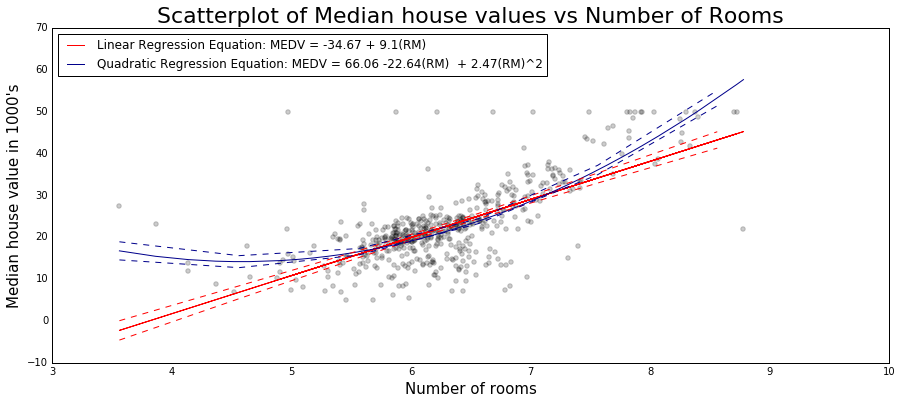

In [6]:
#Plotting scatter plot of median home values vs room and superimposing linear and quadratic regression fits
plt.figure(2, figsize = (15,6))       
Xn = X1[X1[:,0].argsort()]
Xn2 = X2[X2[:,0].argsort()]
yn = y[y[:,0].argsort()]

plt.scatter(X1, y, color = 'black', alpha = 0.2)
plt.plot(X1, lm1.predict(X1), color='red')
plt.plot(Xn, lm2.predict(Xn2), color='darkblue')

# Computing Confidence Interval using the function we defined above
CI = conf_int("RM",1)
plt.plot(CI[0], CI[1], 'r--')
plt.plot(CI[0], CI[2], 'r--')

CI = conf_int("RM",2)
plt.plot(CI[0], CI[1], color='darkblue', linestyle = "dashed")
plt.plot(CI[0], CI[2], color='darkblue', linestyle = "dashed")

plt.xlabel('Number of rooms', fontsize = 15)
plt.ylabel("Median house value in 1000's", fontsize = 15)
plt.title("Scatterplot of Median house values vs Number of Rooms", fontsize = 22)
le = "Linear Regression Equation: MEDV = " + str(np.round(intercept_lm1,2)) + " + " + str(np.round(slope_lm1,2)) + "(RM)"
qe = "Quadratic Regression Equation: MEDV = " + str(np.round(intercept_lm2,2)) + " "
qe2 = str(np.round(slope_lm2[0][0],2)) + "(RM) " + " + " + str(np.round(slope_lm2[0][1],2)) + "(RM)^2"
labels = le, qe+qe2
plt.legend(labels, loc = 2)

ax = plt.subplot(111)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [7]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
X, y : narray
    X: independent variable
    y: dependent variable
    
LR: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
epsilon: float
    The minimum change in RSS required to converge gradient descent
    
beta: int
    We randomly pass inital values of beta to the function
    
Returns
-------
beta: float array of shape 2x1 having Intercept and co-efficient   
"""

def bivariate_ols(x1, y, LR, MaxIterations, epsilon, beta):
    # Initializing variables values
    start_time = time.time()
    has_converged = False
    iterations = 0
    n = float(len(x1))
    
    # Building a matrix X which will have first column as sequence of 1's and next column as a predictor
    X = np.empty([506, 2])
    X[:,0], X[:,1] = 1, x1
    
    # Predicting value of y based on beta, computing difference between predicted and original value and computing RSS
    yhat = np.dot(X, beta)
    delta = yhat - y 
    RSS_original = np.sum((delta - y)**2)

    while not has_converged:
        
        # Calculating the gradient beta based on the difference between original y and predicted y(using new beta)
        # This is implementation of cost function which is supposed to minimize beta
        gradient_beta = np.dot(X.T, delta) / n

        beta = beta - (LR*gradient_beta)
        yhat = np.dot(X, beta)
        delta = yhat - y
        RSS_new = np.sum(delta**2)
        
        if abs(RSS_original - RSS_new) <= epsilon:
            print('Gradient Descent converged at iteration: ', iterations, '\nwith parameter values:', beta)
            has_converged = True
        else:
            RSS_original = RSS_new
        
        iterations += 1  
        if iterations == MaxIterations:
            print('Max interactions:',MaxIterations, 'exceeded!')
            has_converged = True

    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return beta

In [8]:
# Calling the univariate Gradient Descent function

# Initializing beta values
np.random.seed(seed=13579)
beta = [np.random.randint(1,10)]*2
print('Inital beta values',beta,'\n')

# Initializing other function parameters
x1 = bdata.data[:,np.where(bdata.feature_names == "RM")[0][0]]
y = bdata.target
MaxIterations = 1000000
epsilon=0.0001

print('Invoking Gradient Descent function with learning rate: 0.001')
LR = 0.001
bivariate_beta1 = bivariate_ols(x1, y, LR, MaxIterations, epsilon, beta)

print('\nInvoking Gradient Descent function with learning rate: 0.01')
LR = 0.01
bivariate_beta2 = bivariate_ols(x1, y, LR, MaxIterations, epsilon, beta)

print('\nInvoking Gradient Descent function with learning rate: 0.1')
LR = 0.1
bivariate_beta3 = bivariate_ols(x1, y, LR, MaxIterations, epsilon, beta)

Inital beta values [1, 1] 

Invoking Gradient Descent function with learning rate: 0.001
Gradient Descent converged at iteration:  315000 
with parameter values: [-33.85391323   8.97371841]
Time taken: 8.6 seconds

Invoking Gradient Descent function with learning rate: 0.01
Gradient Descent converged at iteration:  41073 
with parameter values: [-34.41238366   9.0615128 ]
Time taken: 1.12 seconds

Invoking Gradient Descent function with learning rate: 0.1
Max interactions: 1000000 exceeded!
Time taken: 27.64 seconds


** 2.1 Interpretation **

We see that using gradient descent, we get similar parameter estimates as we got earlier, using linear regression formula.

As for the learning rate, we see that when the learning rate is very small - 0.001, Gradient Descent takes a ling time to converge. When the learning rate is large - 0.1, the Gradient Descent diverges. However at mid-range learning rate of 0.01, the Gradient Descent converges in a quick time and also gives accurate values.

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [10]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [11]:
import time

"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
X, y : narray
    X: independent variables
    y: dependent variable
    
LR: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
epsilon: float
    The minimum change in RSS required to converge gradient descent
    
beta: int
    We randomly pass inital values of beta to the function
    
Returns
-------
beta: float array of shape nx1 having 1 Intercept and n co-efficients  
"""

def multivariate_ols(X, y, LR, MaxIterations, epsilon, beta):
    # Initializing variables values
    start_time = time.time()
    has_converged = False
    iterations = 0
    n = float(len(X))
    
    # Predicting value of y based on beta, computing difference between predicted and original value and computing RSS
    yhat = np.dot(X, beta)
    delta = yhat - y 
    RSS_original = np.sum((delta - y)**2)

    while not has_converged:
        
        # Calculating the gradient beta based on the difference between original y and predicted y(using new beta)
        # This is implementation of cost function which is supposed to minimize beta
        gradient_beta = np.dot(X.T, delta) / n

        beta = beta - (LR*gradient_beta)
        yhat = np.dot(X, beta)
        delta = yhat - y
        RSS_new = np.sum(delta**2)
        
        if abs(RSS_original - RSS_new) <= epsilon:
            print('Gradient Descent converged at iteration: ', iterations, '\nwith parameter values:', beta)
            has_converged = True
        else:
            RSS_original = RSS_new
        
        iterations += 1  
        if iterations == MaxIterations:
            print('Max interactions:',MaxIterations, 'exceeded!')
            has_converged = True

    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds\n")
    return beta

In [12]:
# Calling the multivariate Gradient Descent function after standardizing the variables

# Building a matrix X which will have first column as sequence of 1's and next column as a standardized predictor
x1 = standardize(bdata.data[:,np.where(bdata.feature_names == "RM")[0][0]])
x2 = standardize(bdata.data[:,np.where(bdata.feature_names == "CRIM")[0][0]])
X = np.empty([506, 3])
X[:,0], X[:,1], X[:,2]= 1, x1, x2

# Initializing beta values
np.random.seed(seed=13579)
beta = np.array([np.random.randint(1,10)]*3)
print('Inital beta values',beta,'\n')

# Initializing other function parameters
y = bdata.target
MaxIterations = 1000000
epsilon=0.0001

print('Invoking Gradient Descent function with learning rate: 0.001')
LR = 0.001
multivariate_beta = multivariate_ols(X, y, LR, MaxIterations, epsilon, beta)

print('Invoking Gradient Descent function with learning rate: 0.01')
LR = 0.01
multivariate_beta = multivariate_ols(X, y, LR, MaxIterations, epsilon, beta)

print('Invoking Gradient Descent function with learning rate: 0.1')
LR = 0.1
multivariate_beta = multivariate_ols(X, y, LR, MaxIterations, epsilon, beta)

Inital beta values [1 1 1] 

Invoking Gradient Descent function with learning rate: 0.001
Gradient Descent converged at iteration:  7705 
with parameter values: [ 22.52315131   5.89206953  -2.25028711]
Time taken: 0.21 seconds

Invoking Gradient Descent function with learning rate: 0.01
Gradient Descent converged at iteration:  883 
with parameter values: [ 22.5298236    5.89352697  -2.24934095]
Time taken: 0.03 seconds

Invoking Gradient Descent function with learning rate: 0.1
Gradient Descent converged at iteration:  96 
with parameter values: [ 22.53202177   5.89409124  -2.24890768]
Time taken: 0.0 seconds



** 2.3 Interpretation **

We see that using gradient descent for bivariate parameters, we get similar parameter estimates as we got using nearest neighbor and KNN in the previous problem set. The vaues of the parameter can be interpreted as - the increase in median house value is a function of approximately 5.89 times the value of room and -2.24 times the value of criminal activity. In the absence of criminal activity and for zero rooms, the median cost of a house can be interpreted as the intercept value - 22.53 * 1000. Intercepts are required to fit the model and may or may not make sense practically.

As for the learning rate, we see that because the variables have been normalized, no matter what learning rate we chose, the function executes in a very quick time and gives accurate estimates.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [13]:
# Calling the multivariate Gradient Descent function without standardizing the variables

# Building a matrix X which will have first column as sequence of 1's and next columns as a standardized predictor
x1 = bdata.data[:,np.where(bdata.feature_names == "RM")[0][0]]
x2 = bdata.data[:,np.where(bdata.feature_names == "CRIM")[0][0]]
X = np.empty([506, 3])
X[:,0], X[:,1], X[:,2] = 1, x1, x2

# Initializing beta values
np.random.seed(seed=13579)
beta = np.array([np.random.randint(1,10)]*3)
print('Inital beta values',beta,'\n')

# Initializing other function parameters
y = bdata.target
MaxIterations = 1000000
epsilon=0.0001

print('Invoking Gradient Descent function with learning rate - 0.001')
LR = 0.001
multivariate_beta = multivariate_ols(X, y, LR, MaxIterations, epsilon, beta)

print('Invoking Gradient Descent function with learning rate - 0.01')
LR = 0.01
multivariate_beta = multivariate_ols(X, y, LR, MaxIterations, epsilon, beta)

print('Invoking Gradient Descent function with learning rate - 0.1')
LR = 0.1
multivariate_beta = multivariate_ols(X, y, LR, MaxIterations, epsilon, beta)

Inital beta values [1 1 1] 

Invoking Gradient Descent function with learning rate - 0.001
Gradient Descent converged at iteration:  317405 
with parameter values: [-28.42492377   8.26126116  -0.26475148]
Time taken: 8.88 seconds

Invoking Gradient Descent function with learning rate - 0.01
Gradient Descent converged at iteration:  42015 
with parameter values: [-29.02445836   8.35444416  -0.26274889]
Time taken: 1.17 seconds

Invoking Gradient Descent function with learning rate - 0.1
Max interactions: 1000000 exceeded!
Time taken: 28.28 seconds



** 2.4 Interpretation **

We see that using gradient descent for bivariate parameters, we get similar parameter estimates as we got using Nearest Neighbor in the previous problem set.

As for the learning rate, we see that when the learning rate is very small: 0.001, Gradient Descent takes a ling time to converge. When the learning rate is large: 0.1, the Gradient Descent diverges. However at mid-range learning rate of 0.01, the Gradient Descent converges in a quick time and also gives accurate values.

However, overall the time taken and accuracy is not as good as what we obtained when the variables were standardized.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, it would be wise for you to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [14]:
# Calling the multivariate Gradient Descent function with cross validation

print("Uisng 10 fold cross validation to calculate value of Gradient Descent")

# Building a matrix X which will have first column as sequence of 1's and next column as a standardized predictor
x1 = standardize(bdata.data[:,np.where(bdata.feature_names == "RM")[0][0]])
x2 = standardize(bdata.data[:,np.where(bdata.feature_names == "CRIM")[0][0]])
X_cv = np.empty([506, 3])
X_cv[:,0], X_cv[:,1], X_cv[:,2] = 1, x1, x2

# Initializing beta values
np.random.seed(seed=13579)
beta_cv = np.array([np.random.randint(1,10)]*3)
print('Inital beta values',beta_cv,'\n')

# Initializing other function parameters
y_cv = bdata.target
LR_cv = 0.001
MaxIterations_cv = 1000000
epsilon_cv = 0.0001

# Estimating value of parameters 10 times using K fold cross validation
kf_multi_GD = KFold(len(y_cv), n_folds=10)
beta_value_cv, i = np.empty([10, 3]), 0
for train_index, test_index in kf_multi_GD:
    X_train, y_train = X_cv[train_index], y_cv[train_index]
    print("Fold", i+1)
    beta_value_cv[i] = multivariate_ols(X_train, y_train, LR_cv, MaxIterations_cv, epsilon_cv, beta_cv)
    i+=1
    
average_kfold_beta = np.sum(beta_value_cv, axis=0)/10
    
print("The average intercept and coefficient values for 10 fold cross validation with predictors CRIM and RM are:\n",
      average_kfold_beta)

Uisng 10 fold cross validation to calculate value of Gradient Descent
Inital beta values [1 1 1] 

Fold 1
Gradient Descent converged at iteration:  7779 
with parameter values: [ 22.66131062   5.78296804  -2.30636308]
Time taken: 0.21 seconds

Fold 2
Gradient Descent converged at iteration:  7695 
with parameter values: [ 22.53885025   5.85464149  -2.2622632 ]
Time taken: 0.2 seconds

Fold 3
Gradient Descent converged at iteration:  7922 
with parameter values: [ 22.75889474   5.87727431  -2.3354146 ]
Time taken: 0.21 seconds

Fold 4
Gradient Descent converged at iteration:  7959 
with parameter values: [ 21.96143011   5.21623783  -2.19664241]
Time taken: 0.23 seconds

Fold 5
Gradient Descent converged at iteration:  7952 
with parameter values: [ 22.33134037   5.68927866  -2.22121428]
Time taken: 0.24 seconds

Fold 6
Gradient Descent converged at iteration:  8315 
with parameter values: [ 22.12593507   5.26305971  -2.23488033]
Time taken: 0.25 seconds

Fold 7
Gradient Descent converge

** 3.1 Interpretation **

10 fold cross validation has helped us to avoid overfitting our model. We have taken the parameter estimates 10 times for different subsets of train and test and finally taken the average of those parameters to arrive at final value of parameters.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [15]:
# Fitting test data using beta parameters derived above from K-fold cross validation
rmse_value_test, i = np.zeros(10), 0
for train_index, test_index in kf_multi_GD:
    X_test, y_test = X_cv[test_index], y_cv[test_index]
    rmse_value_test[i] = np.sqrt((np.sum((np.dot(X_test, beta_value_cv[i]) - y_test)**2))/len(X_test))
    i+=1
print("Average RMSE for test is:", np.sum(rmse_value_test)/10)

Average RMSE for test is: 5.77292658213


** 3.2 Interpretation **

The RMSE after normalization for the predictors CRIM and RM was 7.53645857763 for nearest neighbor and 5.10971048938 for KNN (for K = 5). In this case, for Gradient Descent, we got a test RMSE value of 5.77292658213 which is slightly higher than KNN and lower than nearest neighbor. For now we can say that the Gradient Descent performed better than Nearest Neighbor but slightly worse than KNN.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [ ]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have *K+K^2/2* features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [16]:
# Defining a helper function which will take column pointer at correct position when creating the features
def column_pointer(k_val,length):
    pointer = 0
    for i in range (0,length):
        pointer = pointer + k_val - i
    return pointer

# Creating matrix which will hold all 104 features (F_s) as well as computing the names of the corresponding features (F_n)
K=13
F_s_cols = int(K + K*(K+1)/2)
F_s_rows = len(bdata.data)
col_pointer = 0
F_s = np.zeros([F_s_rows, F_s_cols])
F_n = [None] * F_s_cols

# Function to populate value in the matris F_s which will contain all features
for i in range(0, K):
    F_s[:,col_pointer] = standardize(bdata.data[:,i])
    F_n[col_pointer] = str(col_pointer) + '. ' + bdata.feature_names[i]
    col_pointer += 1
    for j in range(0, K-i):
        F_s[:,col_pointer+j] = standardize(bdata.data[:,i] * bdata.data[:,i+j])
        F_n[col_pointer+j] = str(col_pointer+j) + '. ' + bdata.feature_names[i] + '*' +  bdata.feature_names[i+j]
    col_pointer = column_pointer(K+1,i+1)
    
print('Shape of our interaction matrix is:', F_s.shape)

# Generating training set having 66% of the data and testing set havin 34% of the data

np.random.seed(seed=13579)
# Appending the target variable to data variables and adding another column for index
bdata_full = np.hstack((F_s, np.atleast_2d(bdata.target).T))
bdata_full = np.hstack((bdata_full, np.atleast_2d(np.arange(0,506,1)).T))

# Performing random shuffle
np.random.shuffle(bdata_full)

# Performing a 66% - 34% Train - Test split
bdata_train = bdata_full[0:int(np.ceil(len(bdata_full)*0.66)),:]
bdata_test = bdata_full[int(np.ceil(len(bdata_full)*0.66)):,:]

print("\nTrain data size -",len(bdata_train), "\nTest data size -",len(bdata_test))
print("Training target mean -", bdata_train[:,104].mean(), "\nTesting target mean -", bdata_test[:,104].mean())

Shape of our interaction matrix is: (506, 104)

Train data size - 334 
Test data size - 172
Training target mean - 22.0458083832 
Testing target mean - 23.4784883721


### 4.2 Let's overfit!
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those *K+K/2* features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [17]:
# Calling multivariate Gradient Descent function without cross validation

# Initializing beta values
Features = 7
np.random.seed(seed=13579)
beta = np.array([np.random.randint(1,10)]*(Features + 1))

# print("Selecting the features: CRIM, ZN, RM, AGE, DIS, TAX\n")
print("Selecting the features: CRIM, RM, AGE, TAX*PTRATIO, DIS*RAD, NOX*LSTAT, CHAS*B\n")
mask = np.zeros(bdata_train.shape[1],dtype=bool)
#mask[0], mask[14], mask[60],  mask[69], mask[77], mask[90]  = 1, 1, 1, 1, 1, 1
mask[0], mask[60], mask[48],  mask[69], mask[92], mask[79], mask[59],  = 1, 1, 1, 1, 1, 1, 1

# Building train matrix X which will have first column as sequence of 1's and next columns as a standardized predictors
X_tr = np.empty([len(bdata_train), (Features + 1)])
X_tr[:,0], X_tr[:,1:] = 1, standardize(bdata_train[:,mask])

# Building test matrix X which will have first column as sequence of 1's and next columns as a standardized predictors
X_ts = np.empty([len(bdata_test), (Features + 1)])
X_ts[:,0], X_ts[:,1:] = 1, standardize(bdata_test[:,mask])

# Initializing other function parameters
y_tr = bdata_train[:,104]
y_ts = bdata_test[:,104]
LR = 0.001
MaxIterations = 1000000
epsilon=0.0001

# Calling Gradient Descent function for multiple features on training set
multifeature_train_beta = multivariate_ols(X_tr, y_tr, LR, MaxIterations, epsilon, beta)

# Calculating RMSE for training and testing based on the parameters derived above
rmse_train = np.sqrt((np.sum((np.dot(X_tr, multifeature_train_beta) - y_tr)**2))/len(X_tr))
rmse_test = np.sqrt((np.sum((np.dot(X_ts, multifeature_train_beta) - y_ts)**2))/len(X_ts))

print("Train RMSE is:", rmse_train, "\nTest RMSE is:", rmse_test)

Selecting the features: CRIM, RM, AGE, TAX*PTRATIO, DIS*RAD, NOX*LSTAT, CHAS*B

Gradient Descent converged at iteration:  15948 
with parameter values: [ 22.04580591   0.19035078   0.2657584   -3.2195416    3.56865538
   0.19354458  -0.40418728  -1.5727432 ]
Time taken: 0.46 seconds

Train RMSE is: 5.1263256374 
Test RMSE is: 6.29393739293


** 4.2 Interpretation **

On comparing the RMSE values of the training set with the testing set, we see that the RMSE of training set is lower than testing set. That means our model performs better on training data than testing data. This is a clear indication of overfitting on testing dataset.

For Nearest Neigbor in problem set 3, the test RMSE value for features - CRIM, ZN, RM, AGE, DIS, TAX, after standardization and 10 fold cross validation was: 7.53645857763. For KNN in problem set 3, the test RMSE value for above features, after standardization and 25-fold cross validation was: 4.82342522271. Here we have selected 7 features (CRIM, RM, AGE, TAX*PTRATIO, DIS*RAD, NOX*LSTAT, CHAS*B), i.e. 1 additional feature and we still see that the test RMSE value is much higher: 6.29393739293 as compared to KNN and slightly lower when compared to nearest neighbor. This can again be attributed to overfitting the data on the training dataset.

If we compare the test RMSE with the test RMSE in question 3.2 which was 5.38549696774, we clearly see that even though we have increased the number of features, the RMSE value has not decreased. The model has not become better. This is owing to overfitting of the model on the training data.

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 3.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [18]:
import time

"""
Function
--------
multivariate_ridge_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
X, y : narray
    X: independent variables
    y: dependent variable
    
LR: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
epsilon: float
    The minimum change in RSS required to converge gradient descent
    
beta: int
    We randomly pass inital values of beta to the function
    
lamda: float
    The lamda value which will penalize cost function
    
do_print: boolean
    Booloean value for printing the output
    
Returns
-------
beta: float array of shape nx1 having 1 Intercept and n co-efficients  
"""

def multivariate_ridge_ols(X, y, LR, MaxIterations, epsilon, beta, lamda, do_print):
    # Initializing variables values
    start_time = time.time()
    has_converged = False
    iterations = 0
    n = float(len(X))
    
    # Predicting value of y based on beta, computing difference between predicted and original value and computing RSS
    yhat = np.dot(X, beta)
    delta = yhat - y 
    RSS_original = np.sum((delta - y)**2)

    while not has_converged:
        
        # Calculating the gradient beta based on the difference between original y and predicted y(using new beta)
        # This is implementation of cost function which is supposed to minimize beta
        gradient_beta = np.dot(X.T, delta) / n
        penalty_beta = 2*(lamda/n)*(beta)

        # Calculating new value of beta with added penalty for extra parameter
        beta = beta - (LR*(gradient_beta + penalty_beta))
        yhat = np.dot(X, beta)
        delta = yhat - y
        RSS_new = np.sum(delta**2)
        
        if abs(RSS_original - RSS_new) <= epsilon:
            if do_print:
                print('Gradient Descent converged at iteration: ', iterations, '\nwith parameter values:', beta)
            has_converged = True
        else:
            RSS_original = RSS_new
        
        iterations += 1  
        if iterations == MaxIterations:
            if do_print:
                print('Max interactions:',MaxIterations, 'exceeded!')
            has_converged = True
    if do_print:
        print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds\n")
    return beta

In [19]:
# Calling multivariate Gradient Descent function based on X and y values computed in question 3.2 (with cross validation)
# for the features - CRIM, RM

do_print = False
lamdas = [0, 0.001, 0.005, 0.1, 0.5, 0.8, 1, 3, 6, 8, 9, 10, 11, 12, 15, 20]

beta_value_cv, i = np.empty([10, 3]), 0
rmse_train_lamda_cv, rmse_test_lamda_cv = np.zeros([len(lamdas)]), np.zeros([len(lamdas)])
rmse_train_avg_lamda_cv, rmse_test_avg_lamda_cv = np.zeros([len(lamdas)]), np.zeros([len(lamdas)])

beta_ridge_cv, i, j = np.empty([10, 3]), 0, 0
for lamda in lamdas:
    for train_index, test_index in kf_multi_GD:
        X_train, y_train = X_cv[train_index], y_cv[train_index]
        X_test, y_test = X_cv[test_index], y_cv[test_index]
        beta_ridge_cv[i] = multivariate_ridge_ols(X_train,y_train,LR_cv,MaxIterations_cv,epsilon_cv,beta_cv,lamda,do_print)
        
        rmse_train_lamda_cv[i] = np.sqrt((np.sum((np.dot(X_train, beta_ridge_cv[i]) - y_train)**2))/len(X_train))
        rmse_test_lamda_cv[i] = np.sqrt((np.sum((np.dot(X_test, beta_ridge_cv[i]) - y_test)**2))/len(X_test))
        i+=1
    rmse_train_avg_lamda_cv[j] = np.sum(rmse_train_lamda_cv)/10
    rmse_test_avg_lamda_cv[j] = np.sum(rmse_test_lamda_cv)/10
    print("RMSE for Ridge Gradient Descent with lamda:", lamdas[j], "\nTrain RMSE is:", 
              rmse_train_avg_lamda_cv[j], "\nTest RMSE is:", rmse_test_avg_lamda_cv[j],"\n**********\n")
    i = 0
    j+=1

index = np.where(np.min(rmse_test_avg_lamda_cv) == rmse_test_avg_lamda_cv)[0][0]
print("Minimum Test RMSE is:", np.min(rmse_test_avg_lamda_cv), "Obtained at lamda:", lamdas[index])

RMSE for Ridge Gradient Descent with lamda: 0 
Train RMSE is: 6.18467815316 
Test RMSE is: 5.77292658213 
**********

RMSE for Ridge Gradient Descent with lamda: 0.001 
Train RMSE is: 6.18467822036 
Test RMSE is: 5.77292367732 
**********

RMSE for Ridge Gradient Descent with lamda: 0.005 
Train RMSE is: 6.1846785071 
Test RMSE is: 5.77291011594 
**********

RMSE for Ridge Gradient Descent with lamda: 0.1 
Train RMSE is: 6.18469135376 
Test RMSE is: 5.77265807415 
**********

RMSE for Ridge Gradient Descent with lamda: 0.5 
Train RMSE is: 6.1849006046 
Test RMSE is: 5.77241741452 
**********

RMSE for Ridge Gradient Descent with lamda: 0.8 
Train RMSE is: 6.18523295744 
Test RMSE is: 5.77257709251 
**********

RMSE for Ridge Gradient Descent with lamda: 1 
Train RMSE is: 6.18553831862 
Test RMSE is: 5.77278579059 
**********

RMSE for Ridge Gradient Descent with lamda: 3 
Train RMSE is: 6.19220273514 
Test RMSE is: 5.77902933506 
**********

RMSE for Ridge Gradient Descent with lamda: 

** 4.3 Interpretation - Part A **

The lamdas we are considering are [0, 0.001, 0.005, 0.1, 0.5, 0.8, 1, 3, 6, 8, 9, 10, 11, 12, 15, 20]

In the previous code block, we called multivariate Gradient Descent function based on X and y values computed in question 3.2 (with cross validation) for the features - CRIM, RM

When we incorporated cross validation and then ran ridge regularised gradient descent, even though there were very few features, we were able to ascertain a good value for lamda which would add just enough penalty so that the test RMSE is the lowest. This is becasue cross validation removes the problem of overfitting.

* When we compare to RMSE from 4.2: 6.29393739293, we see that the minimum RMSE obtained here is definitely lower even though there are less number of features as compared to 4.2. This can be attributed to a combination of cross validation and lamda.

* When we compare to RMSE from 3.2: 5.77292658213, we see that the minimum RMSE obtained here is slightly lower. This is because we are using ridge regularization to find the value of lamda which will minimze the cost and thus the RMSE.

* When we compare to RMSE from previous problem set, the RMSE after normalization for the predictors CRIM and RM was 7.53645857763 for nearest neighbor and 5.10971048938 for KNN. Here we see that the RMSE lies between the RMSE for nearest neighbor and KNN.

In [20]:
# Calling multivariate Gradient Descent function based on X and y values computed in question 4.2 (no cross validation)
# for the features - CRIM, RM, AGE, TAX*PTRATIO, DIS*RAD, NOX*LSTAT, CHAS*B for different values of lamda

do_print = False
lamdas, i = [0, 0.001, 0.005, 0.1, 0.5, 0.8, 1, 3, 6, 8, 9, 10, 11, 12, 15, 20], 0
rmse_train_ridge, rmse_test_ridge = np.zeros([len(lamdas)]), np.zeros([len(lamdas)])

for lamda in lamdas:
    print('Invoking Gradient Descent function with lamda:', lamda)
    ridge_train_beta = multivariate_ridge_ols(X_tr, y_tr, LR, MaxIterations, epsilon, beta, lamda, do_print)
    print('RMSE for training and testing for above lamda value')
    rmse_train_ridge[i] = np.sqrt((np.sum((np.dot(X_tr, ridge_train_beta) - y_tr)**2))/len(X_tr))
    rmse_test_ridge[i] = np.sqrt((np.sum((np.dot(X_ts, ridge_train_beta) - y_ts)**2))/len(X_ts))
    print("Train RMSE for ridge is:", rmse_train_ridge[i], "\nTest RMSE for ridge is:", rmse_test_ridge[i], "\n**********\n")
    i+=1
    
index = np.where(np.min(rmse_test_ridge) == rmse_test_ridge)[0][0]
print("Minimum Test RMSE is:", np.min(rmse_test_ridge), "obtained at lamda:", lamdas[index])

Invoking Gradient Descent function with lamda: 0
RMSE for training and testing for above lamda value
Train RMSE for ridge is: 5.1263256374 
Test RMSE for ridge is: 6.29393739293 
**********

Invoking Gradient Descent function with lamda: 0.001
RMSE for training and testing for above lamda value
Train RMSE for ridge is: 5.12632569584 
Test RMSE for ridge is: 6.29397252309 
**********

Invoking Gradient Descent function with lamda: 0.005
RMSE for training and testing for above lamda value
Train RMSE for ridge is: 5.12632593606 
Test RMSE for ridge is: 6.2941130246 
**********

Invoking Gradient Descent function with lamda: 0.1
RMSE for training and testing for above lamda value
Train RMSE for ridge is: 5.12634831213 
Test RMSE for ridge is: 6.29746097244 
**********

Invoking Gradient Descent function with lamda: 0.5
RMSE for training and testing for above lamda value
Train RMSE for ridge is: 5.12679354974 
Test RMSE for ridge is: 6.31179080092 
**********

Invoking Gradient Descent func

** 4.3 Interpretation - Part B **

The lamdas we are considering are [0, 0.001, 0.005, 0.1, 0.5, 0.8, 1, 3, 6, 8, 9, 10, 11, 12, 15, 20]

In the previous code block, we called multivariate Gradient Descent function based on X and y values computed in question 4.2 (without cross validation) for the features - CRIM, RM

Here, we did not do cross validation before running ridge regularised gradient descent. Because of this, there was over fitting on the training dataset. Because of this, even though we used ridge regularization, lamda was not able to compensate for the overfitting in the testing dataset and we ended up with comparitively high value of RMSE for test.

* When we compare to RMSE from 4.2: 6.29393739293, we see that the minimum RMSE obtained here is the same as RMSE obtained in 4.2. Due to overfitting, the data has fit very well on testing dataset and as lamda changes, it won't do anything to regularize the model since there is already overfitting. Hence the training predictions will always be higher compared to the testing predictions. Moreover, any compensation done by lamda will be nullified by the effect of overfitting and when the lamda increases, the cost will increase too. Hence the test RMSE will be best when there is no lamda or when lamda is zero in this case.

* When we compare to RMSE from 3.2: 5.77292658213, we see that the minimum RMSE obtained here is higher. This is because we are not performing cross validation here and hence overfitting the training data leading to bad prediction on testing data.

* When we compare to RMSE from previous problem set, the RMSE after normalization for the predictors CRIM and RM was 7.53645857763 for nearest neighbor and 5.10971048938 for KNN. Here we see that the RMSE lies between the RMSE for nearest neighbor and KNN, although it is more than RMSE obtained after we had done cross valdation.

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [21]:
# Calling multivariate Gradient Descent function with cross validation for different values of lamda
# for the features CRIM, RM, AGE, TAX*PTRATIO, DIS*RAD, NOX*LSTAT, CHAS*B

# Initializing beta values
Features = 7
np.random.seed(seed=13579)
beta = np.array([np.random.randint(1,10)]*(Features + 1))

print("Selecting the features: CRIM, RM, AGE, TAX*PTRATIO, DIS*RAD, NOX*LSTAT, CHAS*B\n")
mask = np.zeros(F_s.shape[1],dtype=bool)
mask[0], mask[60], mask[48],  mask[69], mask[92], mask[79], mask[59],  = 1, 1, 1, 1, 1, 1, 1

# Building matrix X which will have first column as sequence of 1's and next columns as a standardized predictors
X = np.empty([len(F_s), (Features + 1)])
X[:,0], X[:,1:] = 1, standardize(F_s[:,mask])

# Initializing other function parameters
y = bdata.target
LR = 0.01
MaxIterations = 1000000
epsilon=0.0001
lamdas = [0, 0.001, 0.005, 0.1, 0.5, 0.8, 1, 3, 6, 8, 9, 10, 11, 12, 15, 20]
do_print = False
n_folds = 10
rmse_train_lamda, rmse_test_lamda = np.zeros([n_folds]), np.zeros([n_folds])
rmse_train_avg_lamda, rmse_test_avg_lamda = np.zeros([len(lamdas)]), np.zeros([len(lamdas)])

# Estimating value of lamda using K fold corss validation
kf_lamda_GD = KFold(len(F_s), n_folds)

beta_ridge_lamda, i, j = np.empty([10, Features+1]), 0, 0
for lamda in lamdas:
    for train_index, test_index in kf_lamda_GD:
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        beta_ridge_lamda[i] = multivariate_ridge_ols(X_train, y_train, LR, MaxIterations, epsilon, beta, lamda, do_print)
    
        rmse_train_lamda[i] = np.sqrt((np.sum((np.dot(X_train, beta_ridge_lamda[i]) - y_train)**2))/len(X_train))
        rmse_test_lamda[i] = np.sqrt((np.sum((np.dot(X_test, beta_ridge_lamda[i]) - y_test)**2))/len(X_test))
        i+=1
    rmse_train_avg_lamda[j] = np.sum(rmse_train_lamda)/10
    rmse_test_avg_lamda[j] = np.sum(rmse_test_lamda)/10
    print("RMSE for Ridge Gradient Descent with lamda:", lamdas[j], "\nTrain RMSE is:", 
              rmse_train_avg_lamda[j], "\nTest RMSE is:", rmse_test_avg_lamda[j],"\n**********\n")
    i = 0
    j+=1

Selecting the features: CRIM, RM, AGE, TAX*PTRATIO, DIS*RAD, NOX*LSTAT, CHAS*B

RMSE for Ridge Gradient Descent with lamda: 0 
Train RMSE is: 5.30192932019 
Test RMSE is: 5.92922668245 
**********

RMSE for Ridge Gradient Descent with lamda: 0.001 
Train RMSE is: 5.30192933411 
Test RMSE is: 5.92920941823 
**********

RMSE for Ridge Gradient Descent with lamda: 0.005 
Train RMSE is: 5.30192940389 
Test RMSE is: 5.92914833348 
**********

RMSE for Ridge Gradient Descent with lamda: 0.1 
Train RMSE is: 5.30194054527 
Test RMSE is: 5.92764475529 
**********

RMSE for Ridge Gradient Descent with lamda: 0.5 
Train RMSE is: 5.30218742264 
Test RMSE is: 5.92070489256 
**********

RMSE for Ridge Gradient Descent with lamda: 0.8 
Train RMSE is: 5.30258395121 
Test RMSE is: 5.91525612558 
**********

RMSE for Ridge Gradient Descent with lamda: 1 
Train RMSE is: 5.30294825887 
Test RMSE is: 5.91163910304 
**********

RMSE for Ridge Gradient Descent with lamda: 3 
Train RMSE is: 5.31087968286 
Tes

Value of Lamda which gives minimum RMSE 5.84272592813 for Test is: 9
Value of Lamda which gives minimum RMSE 5.30192932019 for Train is: 0


[]

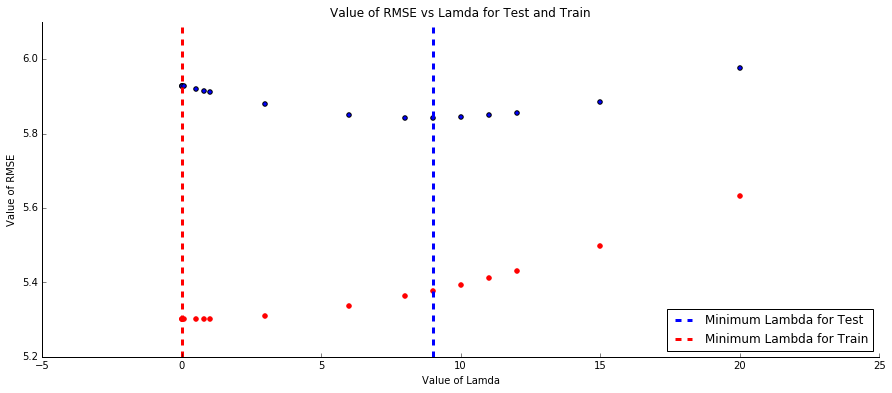

In [22]:
# Plotting the RMSE values for training set and testing set against lamda to see for which value of lamda minimum RMSE occurs

min_RMSE_test_index = np.where(np.min(rmse_test_avg_lamda) == rmse_test_avg_lamda)[0][0]
min_RMSE_train_index = np.where(np.min(rmse_train_avg_lamda) == rmse_train_avg_lamda)[0][0]

print('Value of Lamda which gives minimum RMSE',np.min(rmse_test_avg_lamda),'for Test is:',lamdas[min_RMSE_test_index])
print('Value of Lamda which gives minimum RMSE',np.min(rmse_train_avg_lamda),'for Train is:',lamdas[min_RMSE_train_index])
plt.figure(1, figsize = (15,6))
plt.scatter(lamdas,rmse_test_avg_lamda)
plt.scatter(lamdas,rmse_train_avg_lamda, color = 'r')
plt.axvline(lamdas[min_RMSE_test_index], color = 'b', linestyle = 'dashed', linewidth = 3)
plt.axvline(lamdas[min_RMSE_train_index], color = 'r', linestyle = 'dashed', linewidth = 3)

plt.title("Value of RMSE vs Lamda for Test and Train")
plt.xlabel("Value of Lamda")
plt.ylabel("Value of RMSE")

axes = plt.subplot(111)
axes.spines["top"].set_visible(False)  
axes.spines["right"].set_visible(False)  
axes.get_xaxis().tick_bottom()
axes.get_yaxis().tick_left()

labels = "Minimum Lambda for Test", "Minimum Lambda for Train"
plt.legend(labels, loc = 4)
plt.plot()

** Extra Credit 2 - Interpretation **

The lamdas we are considering are [0, 0.001, 0.005, 0.1, 0.5, 0.8, 1, 3, 6, 8, 9, 10, 11, 12, 15, 20]

We see that after we remove the problem of overfitting (by cross validating), we are able to see more flexibility in how lamda affects the fit.

* We see that for the test RMSE, there is a trend wherein the RMSE value decreases as lamda increases, and then after a threshold, starts increasing again. The threshod gives the best value of lamda.

* For model above using the same features but not cross validation, we saw that the minimum RMSE value 6.29393739293 was obtained at lamda: 0. This is high compared to the minimum test RMSE of 5.84272592813 we have obtained now for lamda 9. This is obviously because of cross validation which we have done.

* For the  2 feature model above which used cross validation, the minimum test RMSE value 5.77241741452 was Obtained at lamda: 0.5. The RMSE value we have obtained here is slightly higher. This means that actually, our model with 2 features, is slightly better than our model with more number of features for prediction (We should not consider the train RMSE since the train RMSE will always decrease with added features. Prediction RMSE gives a better measure). This implies that adding additional features has not improved model accuracy to compensate for additional complexity.

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

In [23]:
# Initializing beta values
Features = 13
np.random.seed(seed=13579)
beta = np.array([np.random.randint(1,10)]*(Features + 1))

print("Selecting the 13 original features\n")
mask = np.zeros(F_s.shape[1],dtype=bool)
mask[0], mask[14], mask[27],  mask[39], mask[50], mask[60]  = 1, 1, 1, 1, 1, 1
mask[69], mask[77], mask[84],  mask[90], mask[95], mask[99], mask[102] = 1, 1, 1, 1, 1, 1, 1

# Building train matrix X which will have first column as sequence of 1's and next columns as a standardized predictors
X = np.empty([len(F_s), (Features + 1)])
X[:,0], X[:,1:] = 1, standardize(F_s[:,mask])

# Initializing other function parameters
y = bdata.target
LR = 0.01
MaxIterations = 1000000
epsilon=0.0001
lamdas = [0, 0.001, 0.005, 0.1, 0.5, 0.8, 1, 3, 6, 8, 9, 10, 11, 12, 15, 20]
do_print = True

ridge_original, i = np.empty([len(lamdas), Features+1]), 0

# Calling Gradient Descent function for multiple features on training set
for lamda in lamdas:
    print("For lamda value:", lamda)
    ridge_original[i] = multivariate_ridge_ols(X, y, LR, MaxIterations, epsilon, beta, lamda, do_print)
    i+=1

Selecting the 13 original features

For lamda value: 0
Gradient Descent converged at iteration:  6606 
with parameter values: [  2.25328063e+01  -9.18154116e-01   1.07697402e+00   1.30540851e-01
   6.83978277e-01  -2.05787795e+00   2.67291470e+00   1.91988833e-02
  -3.10532302e+00   2.62746504e+00  -2.04029934e+00  -2.06098346e+00
   8.56402855e-01  -3.74745395e+00]
Time taken: 0.24 seconds

For lamda value: 0.001
Gradient Descent converged at iteration:  6609 
with parameter values: [  2.25327173e+01  -9.18142282e-01   1.07695208e+00   1.30519925e-01
   6.83981318e-01  -2.05782661e+00   2.67292723e+00   1.91901779e-02
  -3.10526725e+00   2.62738947e+00  -2.04024191e+00  -2.06096935e+00
   8.56402395e-01  -3.74743037e+00]
Time taken: 0.24 seconds

For lamda value: 0.005
Gradient Descent converged at iteration:  6620 
with parameter values: [  2.25323610e+01  -9.18093426e-01   1.07686164e+00   1.30427885e-01
   6.83994672e-01  -2.05761973e+00   2.67297889e+00   1.91540611e-02
  -3.10504

Value of Lamda which gives minimum parameter value -  -0.918154116113 for parameter 1 is: 0
Value of Lamda which gives minimum parameter value -  0.746051126996 for parameter 2 is: 20
Value of Lamda which gives minimum parameter value -  -0.269351016709 for parameter 3 is: 20
Value of Lamda which gives minimum parameter value -  0.683978276635 for parameter 4 is: 0
Value of Lamda which gives minimum parameter value -  -2.05787795056 for parameter 5 is: 0
Value of Lamda which gives minimum parameter value -  2.67291469512 for parameter 6 is: 0
Value of Lamda which gives minimum parameter value -  -0.111430498209 for parameter 7 is: 20
Value of Lamda which gives minimum parameter value -  -3.1053230197 for parameter 8 is: 0
Value of Lamda which gives minimum parameter value -  1.28869696018 for parameter 9 is: 20
Value of Lamda which gives minimum parameter value -  -2.04029933583 for parameter 10 is: 0
Value of Lamda which gives minimum parameter value -  -2.06098345752 for parameter 11

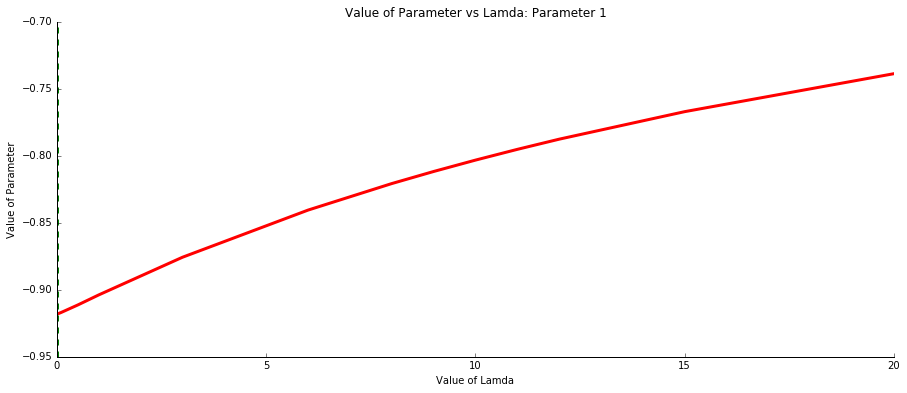

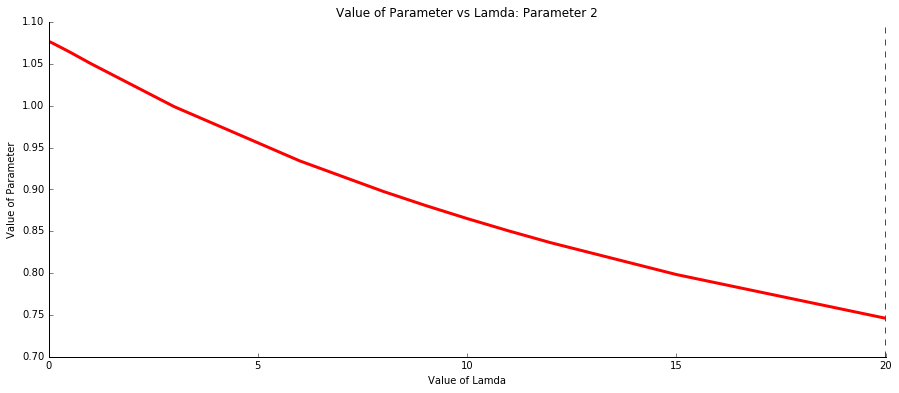

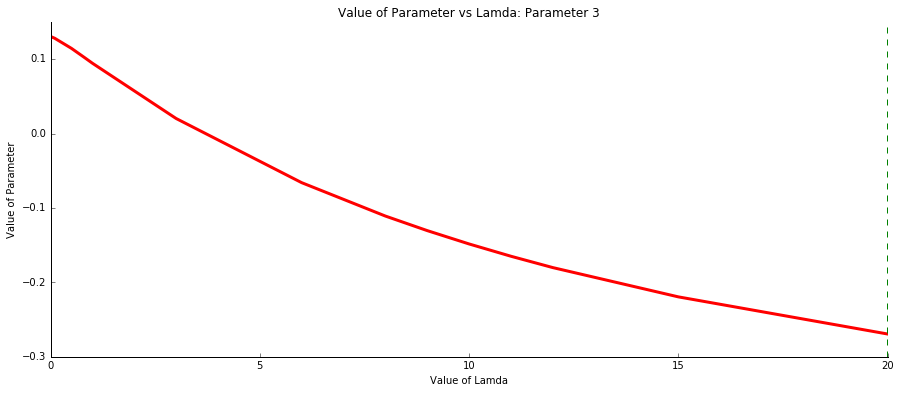

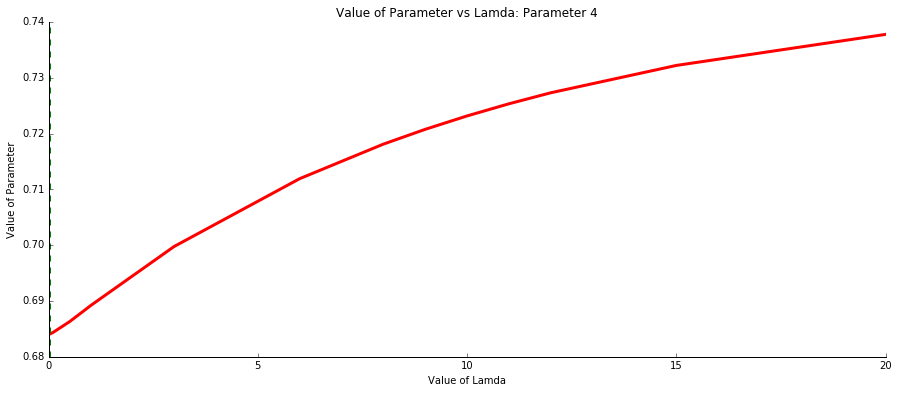

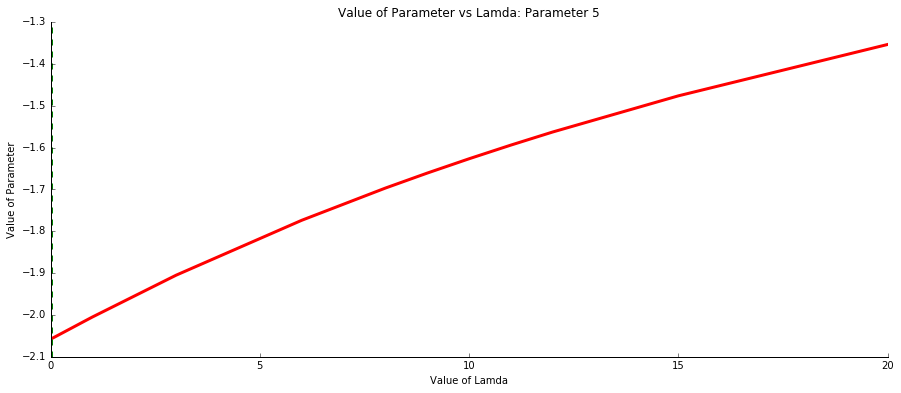

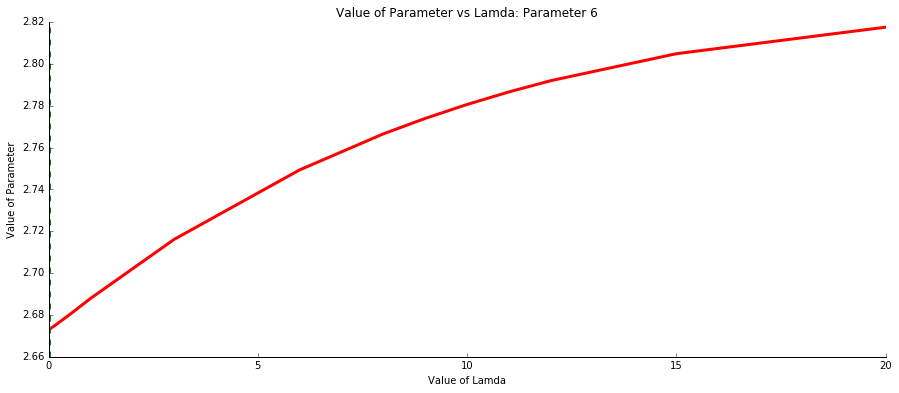

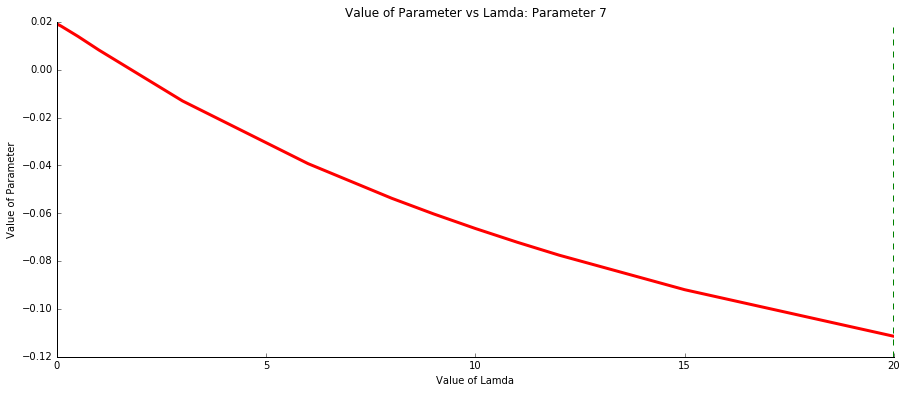

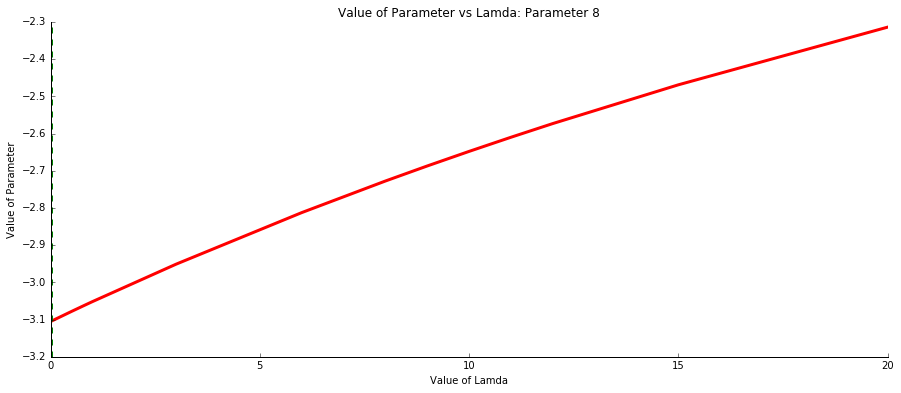

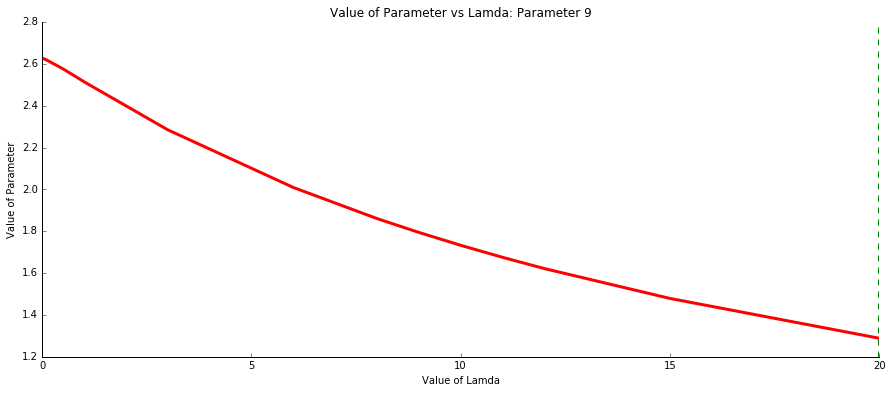

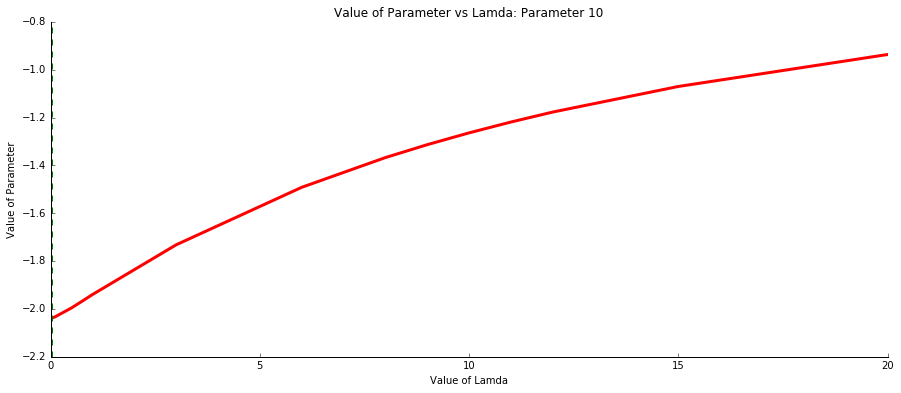

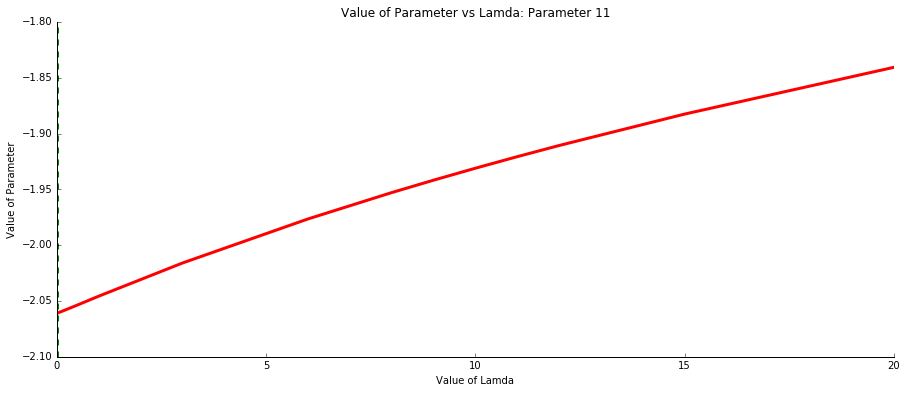

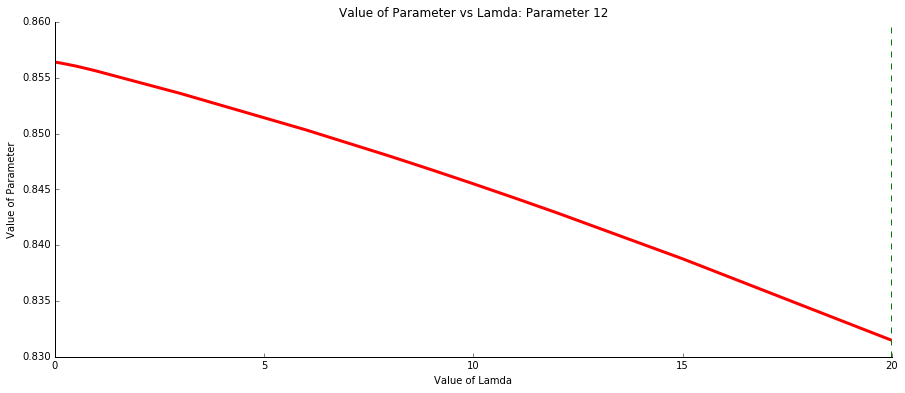

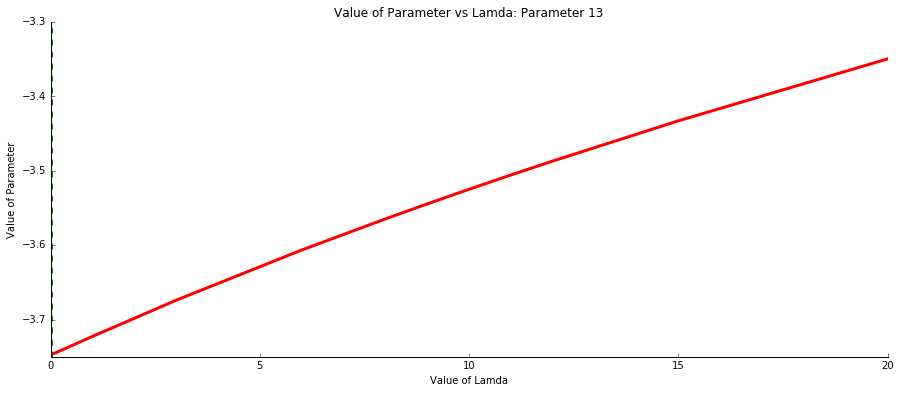

In [24]:
# plotting how the different coefficient estimates change as a function of lambda
    
for i in range(1,14):
    min_parameter_index = np.where(np.min(ridge_original[:,i]) == ridge_original[:,i])[0][0]
    plt.figure(i, figsize = (15,6))
    plt.plot(lamdas,ridge_original[:,i], color = 'r', linewidth = 3)
    plt.axvline(lamdas[min_parameter_index], color = 'g', linestyle = 'dashed', linewidth = 3)
    
    plt.title("Value of Parameter vs Lamda: Parameter " + str(i))
    plt.xlabel("Value of Lamda")
    plt.ylabel("Value of Parameter")
    axes = plt.subplot(111)
    axes.spines["top"].set_visible(False)  
    axes.spines["right"].set_visible(False)  
    axes.get_xaxis().tick_bottom()
    axes.get_yaxis().tick_left()
    
    print('Value of Lamda which gives minimum parameter value - ', np.min(ridge_original[:,i]), 'for parameter', i,
         'is:',lamdas[min_parameter_index])

** Extra Credit 3 - Interpretation **

We see from the plots that for approximately half the parameters, the lamda value which gives minimum parameter value individually is either at 0 or 20. Thus, intuitively, lamda value of around 9 would be a good choice, which is indeed the case as we saw above.